In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l=df["label"]
d=df.drop("label",axis=1)

In [5]:
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
d.shape

(42000, 784)

In [8]:
l.shape

(42000,)

In [9]:
plt.figure(figsize=(7,7))
index=101

<Figure size 504x504 with 0 Axes>

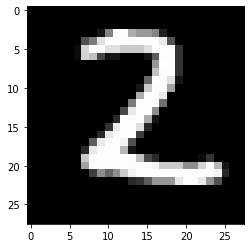

In [10]:
grid_data=d.iloc[index].to_numpy().reshape(28,28)
plt.imshow(grid_data , interpolation="none" , cmap="gray")
plt.show()

In [11]:
l[index]

2

In [13]:
data=d.head(15000)
labels=l.head(15000)

print("The shape of labels is",labels.shape)

The shape of labels is (15000,)


In [15]:
from sklearn.preprocessing import StandardScaler
standard_data=StandardScaler().fit_transform(data)
print(standard_data.shape)

(15000, 784)


In [17]:
sample_data=standard_data

cov_matrix=np.matmul(sample_data.T,sample_data)
print("Print Covariance",cov_matrix.shape)

Print Covariance (784, 784)


In [18]:
from scipy.linalg import eigh

values,vectors=eigh(cov_matrix,eigvals=(782,783))

In [20]:
vectors.shape

(784, 2)

In [21]:
vectors=vectors.T

In [22]:
vectors.shape

(2, 784)

In [23]:
new_cord=np.matmul(vectors,sample_data.T)

In [27]:
new_cord=np.vstack((new_cord,labels)).T

In [36]:
df1=pd.DataFrame(data=new_cord,columns=("2nd principal","1st principal","labels"))

In [37]:
df1.head()

,2nd principal,1st principal,labels
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


/Users/Pankaj/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


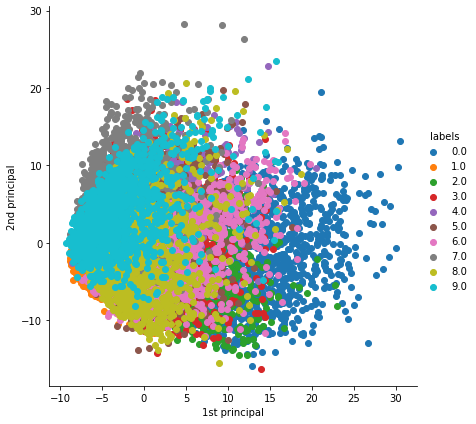

In [38]:
import seaborn as sns

sns.FacetGrid(df1, hue="labels", size=6).map(plt.scatter, '1st principal', '2nd principal').add_legend()
plt.show()